# "Documentation"/Steps

The objective here is to create an interactive dashboard with a sample data set, steps adapted from **[Towards Data Science](https://towardsdatascience.com/creating-an-interactive-dashboard-from-jupyter-notebook-with-voila-b64918b4d15a)**. 

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Numerical_Questions_Full.csv")

In [3]:
data.head()

,Unnamed: 0,Student Name,TeamNumber,TeammateNumber,Q29_1,Q29_2,Q29_3,Q33_1,Q33_2,Q33_3,...,Q17_4,Q17_5,Q17_6,Q30_1,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,ResponseId
0,0,A,1,1,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,R_ZlwqGK7oRXFuk2B
1,1,B,1,2,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,R_3EBj9T7Yvk5B9p8
2,2,C,1,3,3.0,3.0,3.0,3.0,3.0,1.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,R_3kzGFidBS7a7uMY
3,3,D,1,4,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,R_2PaPevsJwcfXqWL
4,4,E,2,1,1.0,1.0,1.0,1.0,3.0,1.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,R_T5xAPMwjZYMFWLL


In [4]:
data = data.rename(columns={"Student Name": "StudentName"})
data = data.drop("Unnamed: 0", axis=1)
q29_1 = data[["StudentName", "TeamNumber", "TeammateNumber", "Q29_1"]]

In [5]:
q29_1

,StudentName,TeamNumber,TeammateNumber,Q29_1
0,A,1,1,1.0
1,B,1,2,1.0
2,C,1,3,3.0
3,D,1,4,1.0
4,E,2,1,1.0
...,...,...,...,...
70,BX,21,2,1.0
71,BZ,21,4,1.0
72,CA,22,1,2.0
73,CD,22,3,2.0


In [6]:
import ipywidgets as widgets
from ipywidgets import Layout
unique_student = data.StudentName.unique()
student = widgets.SelectMultiple(
    options = unique_student.tolist(),
    value = ['A'],
    description='Student',
    disabled=False,
    layout = Layout(width='50%', height='80px', display='flex')
)

In [7]:
student

SelectMultiple(description='Student', index=(0,), layout=Layout(display='flex', height='80px', width='50%'), o…

In [8]:
unique_teammate = data.TeammateNumber.unique()
style = {'description_width': 'initial'}
teammate = widgets.SelectMultiple(
    options = unique_teammate.tolist(),
    value = [1],
    description='Teammate Number',
    disabled=False,
    style=style,
    layout = Layout(width='50%', height='80px')
)

In [9]:
teammate

SelectMultiple(description='Teammate Number', index=(0,), layout=Layout(height='80px', width='50%'), options=(…

In [10]:
unique_questions = ['Q29', 'Q31', 'Q33', 'Q20', 'Q35', 'Q37', 'Q7', 'Q9',
                   'Q11', 'Q16', 'Q21', 'Q15', 'Q16', 'Q17', 'Q30']
#style = {'description_width': 'initial'}
#questions = widgets.SelectMultiple(
#    options = unique_questions,
#    value = [1],
#    description='Question Number',
#    disabled=False,
#    style=style,
#    layout = Layout(width='50%', height='80px')
#)

The reason why the above doesn't work is because the list does not directly come from the df (thus it lacks a reference)

## The overall work flow...

1. Clean data
2. Pivot? Data
3. Use external libraries to create visualizations and connect using python widgets
https://github.com/cxrlsc/modules-ipynb/blob/master/exercises/widgets.ipynb
4. Export into dashboard using voila 
5. Deploy with Heroku

## Let's just visualize these questions

In [15]:
#Let's try for question 29_1, student 1

#can eventually expand to include student, this is just a basic function
def questionSummary(df, question, team):
    
    #Background on Question
    prompt = "Our team was clear about the shared goal for our work together"
    scoring = "1 = strongly agree; 7 = strongly disagree"
    category = "Goals"
    print('\033[1m' + question + '\033[0m' + " was a question about " + category)
    print('\n')
    print("As a reminder, it evaluated if: ", prompt, ", and scored it between ", scoring)
    print('\n')
    
    #Gathering metrics
    class_avg = df[question].mean()
    team_df = df[["StudentName", "TeamNumber", "TeammateNumber", question]]
    grouped_df = team_df.groupby("TeamNumber").mean().reset_index()
    team_avg = grouped_df.iloc[team - 1][2]
    
    #Visualize it
    plt.scatter(x=grouped_df["TeamNumber"], y=grouped_df["Q29_1"])
    plt.xticks(grouped_df["TeamNumber"], [])
    plt.xlabel("Teams")
    plt.ylabel("Average Team Score")
    plt.scatter(11, team_avg, c='#bb4444');
    
    #Feedback 
    class_team_avg = np.mean(grouped_df["Q29_1"])
    abs_diff = round(np.abs(team_avg - class_team_avg), 2)
    if team_avg > class_team_avg:
        print("Your team, as indicated by the", '\033[91m' + "red" + '\033[91m', "dot below, scored " + str(abs_diff) + " points above than the class team average.")
        print('There is always room for improvement!')
    if team_avg < class_team_avg:
        print("Your team, as indicated by the", '\033[91m' + "red" + '\033[90m', "dot below, scored " + str(abs_diff) + " points below than the class team average.")
        print('Keep it up!')
    if team_avg == class_team_avg:
        print("Your team, as indicated by the", '\033[91m' + "red" + '\033[90m', "dot below, scored the same as the class team average.")
        print('Nice job!')

Q29_1 was a question about Goals


As a reminder, it evaluated if:  Our team was clear about the shared goal for our work together , and scored it between  1 = strongly agree; 7 = strongly disagree


Your team, as indicated by the red dot below, scored 0.15 points below than the class team average.
Keep it up!


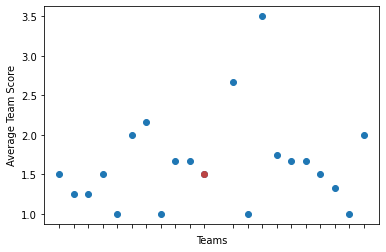

In [12]:
questionSummary(data, "Q29_1", 1)

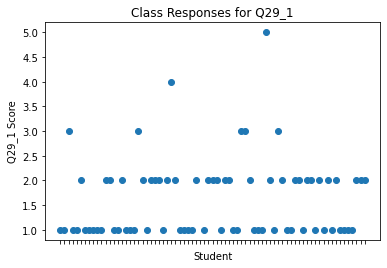

In [13]:
#Class Average
plt.scatter(x=data["StudentName"], y=data["Q29_1"])
plt.xticks(data["StudentName"], [])
plt.xlabel("Student")
plt.ylabel("Q29_1 Score")
plt.title("Class Responses for Q29_1")
plt.rcParams["figure.figsize"] = (12, 6)

In [14]:
#Team Average in Class
plt.scatter(x=grouped_q29_1["TeamNumber"], y=grouped_q29_1["Q29_1"])
plt.xticks(grouped_q29_1["TeamNumber"], [])
plt.xlabel("Teams")
plt.ylabel("Average Team Score")
plt.scatter(11, 1.5, c='#e8178c');

NameError: name 'grouped_q29_1' is not defined